In [ ]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

#os.environ['CUDA_VISIBLE_DEVICES'] = ''

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


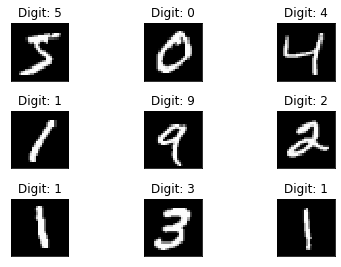

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


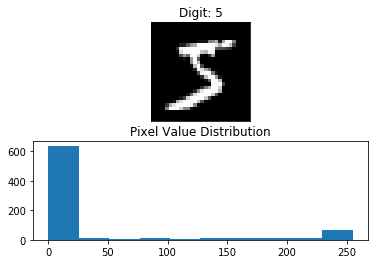

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
'''
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(15))
model.add(Activation('softmax'))

model.add(Dense(10))
model.add(Activation('sigmoid'))
'''
model.add(Dense(10))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=100,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.0557 - acc: 0.6996 - val_loss: 0.0311 - val_acc: 0.8656
Epoch 2/100
 - 1s - loss: 0.0275 - acc: 0.8752 - val_loss: 0.0237 - val_acc: 0.8914
Epoch 3/100
 - 1s - loss: 0.0230 - acc: 0.8908 - val_loss: 0.0209 - val_acc: 0.9026
Epoch 4/100
 - 1s - loss: 0.0209 - acc: 0.8981 - val_loss: 0.0195 - val_acc: 0.9067
Epoch 5/100
 - 1s - loss: 0.0197 - acc: 0.9030 - val_loss: 0.0184 - val_acc: 0.9123
Epoch 6/100
 - 1s - loss: 0.0188 - acc: 0.9068 - val_loss: 0.0178 - val_acc: 0.9129
Epoch 7/100
 - 1s - loss: 0.0182 - acc: 0.9094 - val_loss: 0.0172 - val_acc: 0.9153
Epoch 8/100
 - 1s - loss: 0.0176 - acc: 0.9113 - val_loss: 0.0169 - val_acc: 0.9164
Epoch 9/100
 - 1s - loss: 0.0172 - acc: 0.9134 - val_loss: 0.0165 - val_acc: 0.9180
Epoch 10/100
 - 1s - loss: 0.0169 - acc: 0.9153 - val_loss: 0.0162 - val_acc: 0.9191
Epoch 11/100
 - 1s - loss: 0.0165 - acc: 0.9161 - val_loss: 0.0160 - val_acc: 0.9195
Epoch 12/100
 - 1s - los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


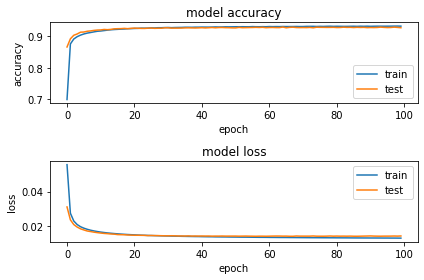

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig